<a href="https://colab.research.google.com/github/dsmn-py/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Saved_Revision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJET CaPytal**
défintion des variables: [ICI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

# Préambule

### Import & chargement

In [ ]:
#Import des modules

# Modules complémentaires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
import statsmodels.api 
from scipy.stats import pearsonr
%matplotlib inline


# PREPORCESSING
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn.ensemble import BaggingClassifier
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

#SVM
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC 


#linear
from sklearn import linear_model

#Random Forest
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

#Decison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

#Xgboost
import xgboost as xgb
from xgboost import XGBClassifier


#LogisticRegression
from sklearn.linear_model import LogisticRegression


# Autres
import os
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://drive.google.com/file/d/1WnBL1zEQo1KVEinJBN6ZfyeW4U4d7Yk3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path, sep = ';')
df = df.rename(columns={'y': 'deposit'})

colors = ['#0F7CBF','#0A3B59','#91BDD9','#C4E1F2','#0F8DBF','#C3CEDA','#738FA7','#0C4160','#071330','#071330','#D83B23']

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Le Dataframe

In [ ]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Le DataFrame ne comporte pas de valeurs manquantes et les données semblent être sous le bon format.

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# **I - DISTRIBUTION & CORRELATION**

## A - Distribution des variables

###1 -  Profil socio-démographique du client

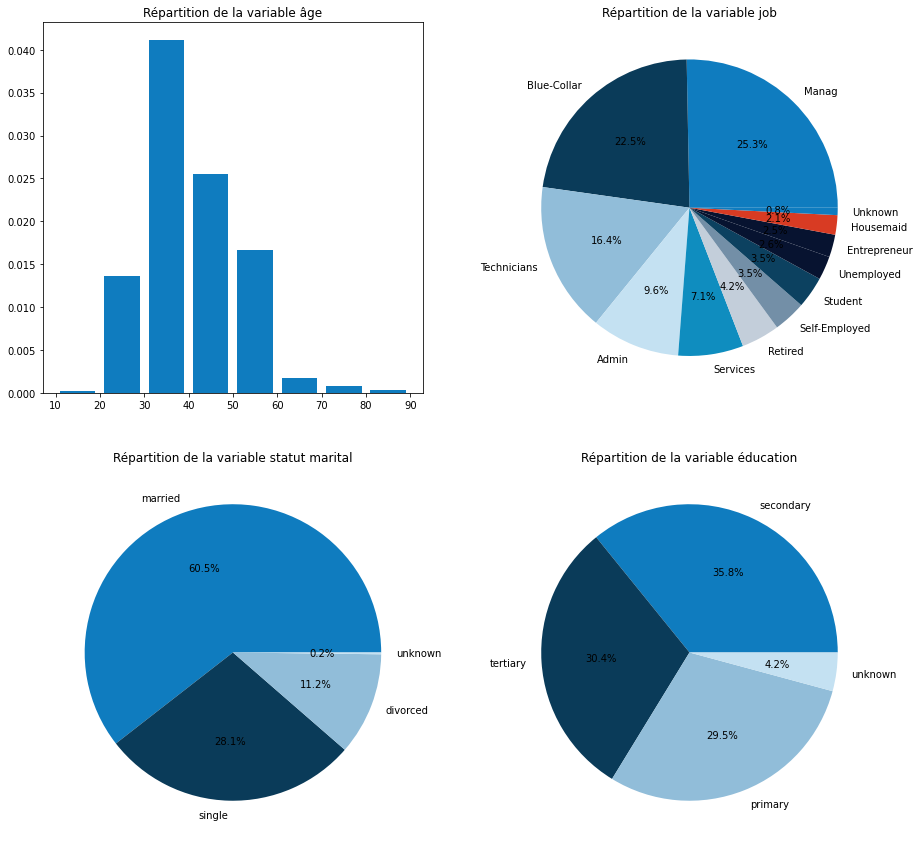

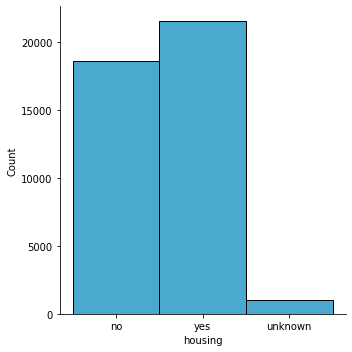

In [ ]:
#@title
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df['age'], bins=[10,20,30,40,50,60,70,80,90], rwidth=0.8, density = True,color = '#0F7CBF')
plt.title('Répartition de la variable âge')

plt.subplot(222)
plt.pie(df['job'].value_counts(), 
        labels=['Manag', 'Blue-Collar', 'Technicians', 'Admin', 'Services', 'Retired', 'Self-Employed', 'Student', 'Unemployed','Entrepreneur', 'Housemaid', 'Unknown'],
       autopct= lambda x : str(round(x,1)) + '%', colors=colors);
plt.title('Répartition de la variable job')

plt.subplot(223)
plt.pie(df['marital'].value_counts(),
       labels=['married','single','divorced', 'unknown'],
       autopct= lambda x : str(round(x,1)) + '%', colors=colors);
plt.title('Répartition de la variable statut marital')

def educ(cell):
    if  'university.degree' in cell:
        return 'tertiary'
    elif 'high.school' in cell:
        return 'secondary'
    elif'basic.9y' in cell:
        return 'primary'
    elif'professional.course' in cell:
        return 'secondary'
    elif'basic.4y' in cell:
        return 'primary'
    elif'basic.6y' in cell:
        return 'primary'
    elif'illiterate' in cell:
        return 'primary'
    elif 'unknow' in cell :
        return 'unknown'
  
df['educ'] = df['education'].apply(educ)

plt.subplot(224)
plt.pie(df['educ'].value_counts(),
       labels=['secondary','tertiary','primary', 'unknown'], 
        autopct= lambda x : str(round(x,1)) + '%',
        colors=colors)
plt.title('Répartition de la variable éducation');

sns.displot(df, x="housing", binwidth=1,color='#0F8DBF');






###2 -  Profil financier du client

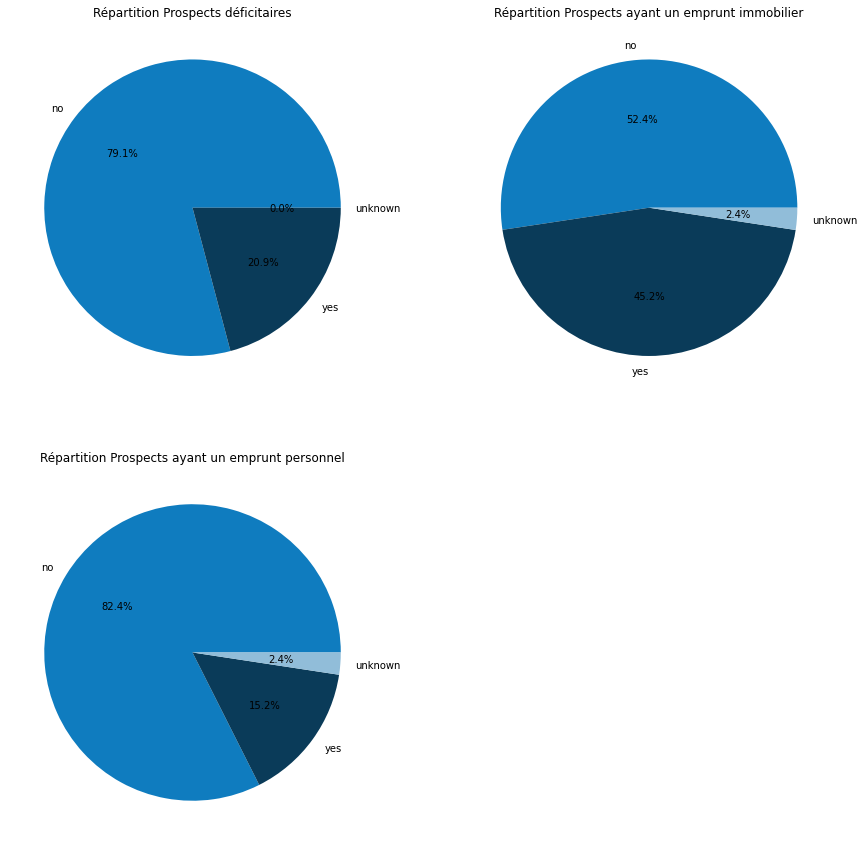

In [ ]:
#@title
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.pie(df['default'].value_counts(), 
        labels=['no', 'yes', 'unknown'],
       autopct= lambda x : str(round(x,1)) + '%',colors=colors);
plt.title('Répartition Prospects déficitaires')

plt.subplot(222)
plt.pie(df['housing'].value_counts(), 
        labels=['no', 'yes', 'unknown'],
       autopct= lambda x : str(round(x,1)) + '%',colors=colors);
plt.title('Répartition Prospects ayant un emprunt immobilier')

plt.subplot(223)
plt.pie(df['loan'].value_counts(), 
        labels=['no', 'yes', 'unknown'],
       autopct= lambda x : str(round(x,1)) + '%',colors=colors);
plt.title('Répartition Prospects ayant un emprunt personnel');



###3 -  Campagnes MKG

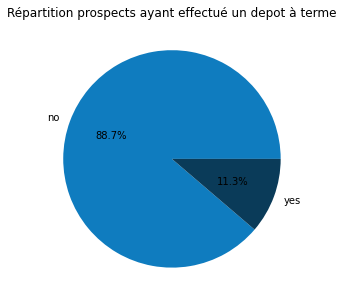

In [ ]:
plt.figure(figsize=(5,5))

plt.pie(df['deposit'].value_counts(),
        labels=['no', 'yes'],
       autopct= lambda x : str(round(x,1)) + '%',colors=colors);
plt.title('Répartition prospects ayant effectué un depot à terme');

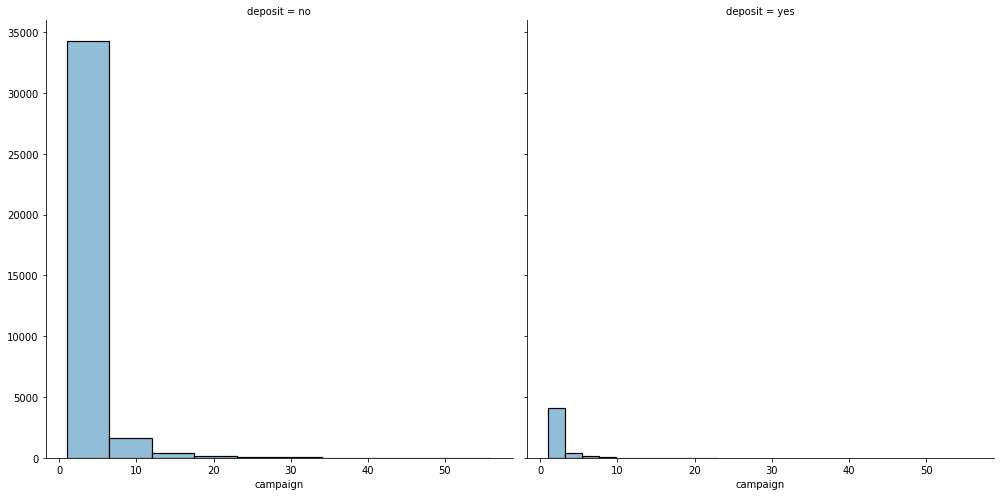

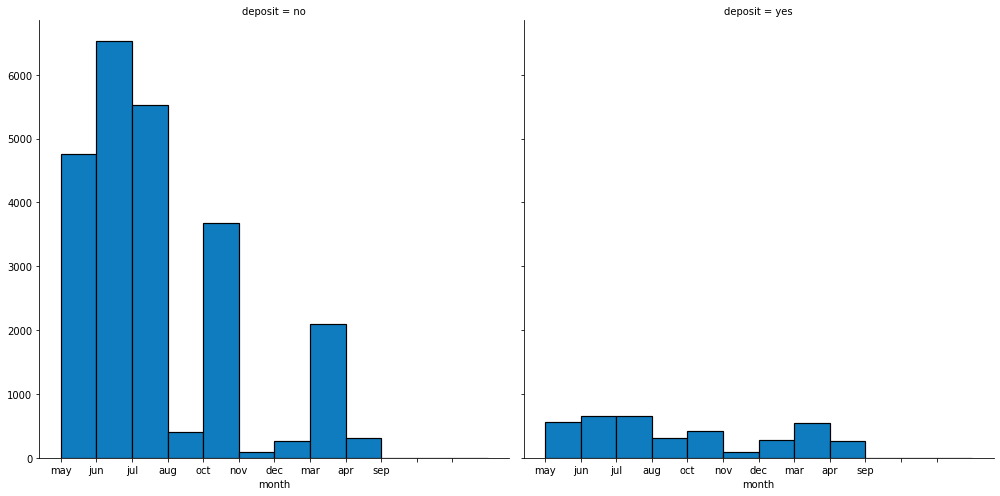

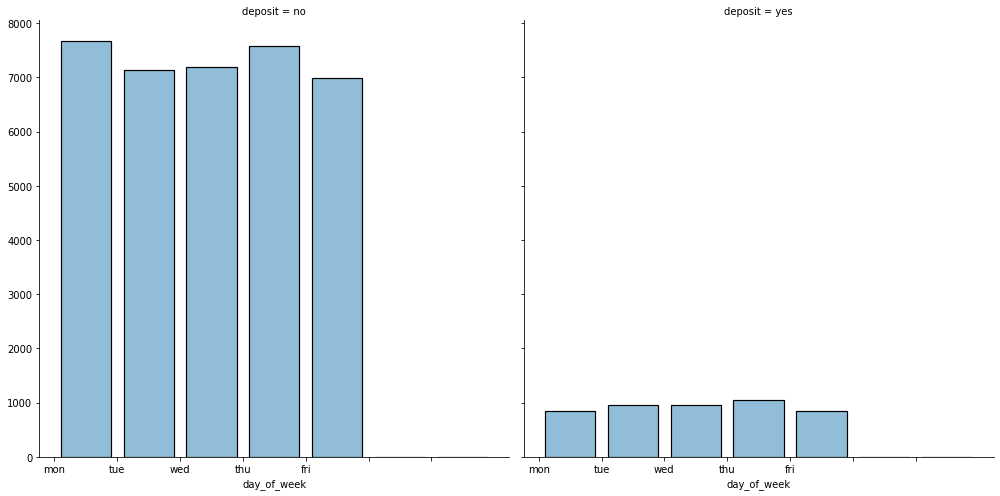

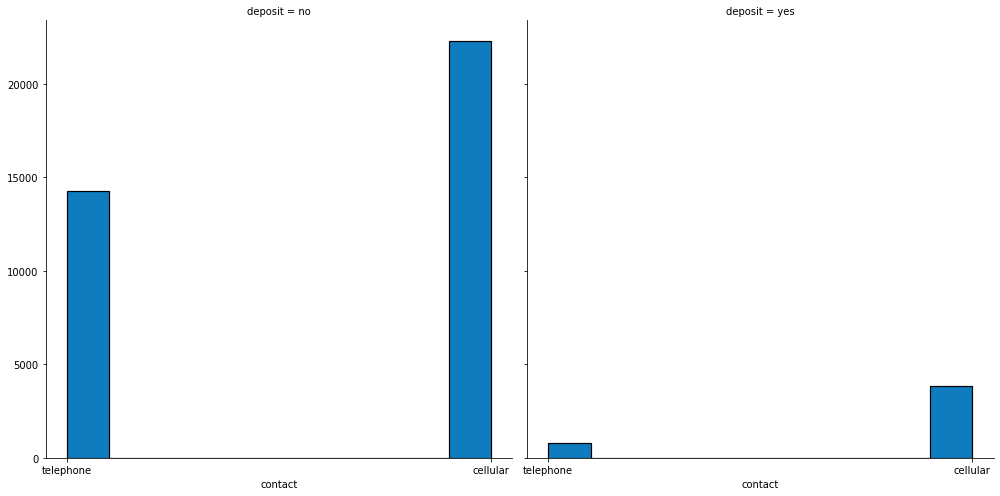

In [ ]:
#@title
# standardisation des mois pour analyser la distribution


def monthToNum(shortMonth):
    return {
            'jan': 1,
            'feb': 2,
            'mar': 3,
            'apr': 4,
            'may': 5,
            'jun': 6,
            'jul': 7,
            'aug': 8,
            'sep': 9, 
            'oct': 10,
            'nov': 11,
            'dec': 12
    }[shortMonth]

df['month_modif'] = df['month'].apply(monthToNum)



g = sns.FacetGrid(df, col='deposit',height=7)
g.map(plt.hist, 'campaign',color='#91BDD9',edgecolor='black', linewidth=1.2);

g = sns.FacetGrid(df, col='deposit',height=7)
g.map(plt.hist, 'month',color='#0F7CBF',edgecolor='black',linewidth=1.2, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13]);
plt.xticks (range(1,13), df['month'].unique());

g = sns.FacetGrid(df, col='deposit',height=7)
g.map(plt.hist, 'day_of_week',color='#91BDD9',edgecolor='black', linewidth=1.2, rwidth = 0.8, bins=[0,1,2,3,4,5,6,7]);
plt.xticks (range(0,7), df['day_of_week'].unique());

g = sns.FacetGrid(df, col='deposit',height=7)
g.map(plt.hist, 'contact',color='#0F7CBF',edgecolor='black', linewidth=1.2);




# sns.displot(df, x="month_modif", binwidth=1,color='#0F7CBF',hue='deposit'); 
# sns.displot(df, x="campaign", binwidth=10,color='#0F7CBF',hue='deposit');
# sns.displot(df, x="day", binwidth=5,kde=True,color='#0F7CBF',hue='deposit');
# sns.displot(df, x="contact", binwidth=5,color='#0F7CBF',hue='deposit')


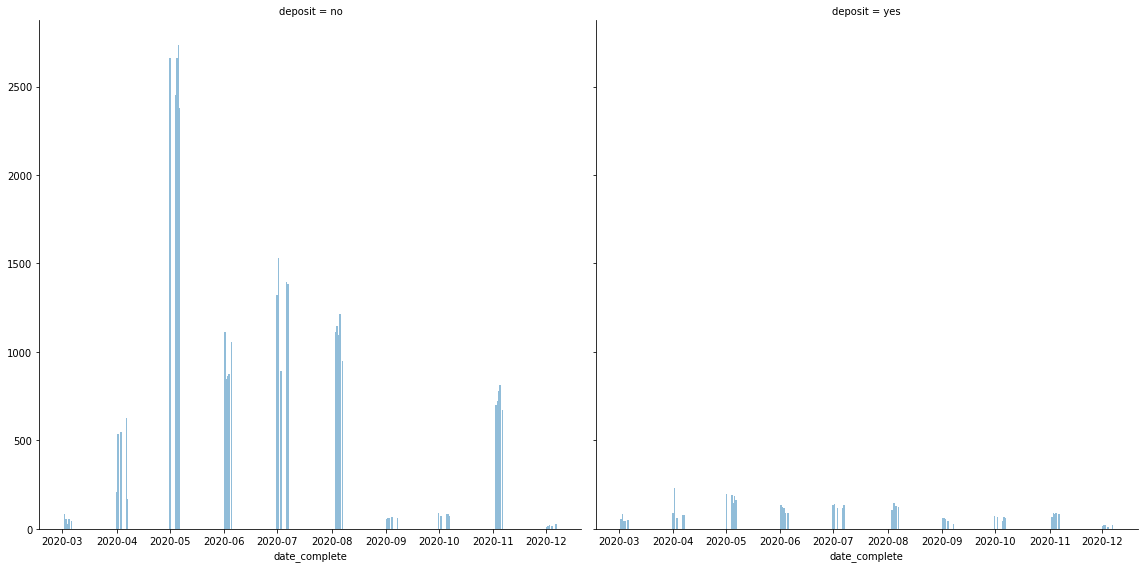

In [ ]:
#@title
import datetime 

# datetime in string format for may 25 1999
input = '2021/05/25'
# format
format = '%Y/%m/%d'

df['week']=''

df['date_complete']= '2020'+' '+df['month'].astype(str) +' '+df['day_of_week'].astype(str)
df['date_complete']= pd.to_datetime(df['date_complete']) 


df.head()
g = sns.FacetGrid(df, col='deposit',height=8)
g.map(plt.hist, 'date_complete',color='#91BDD9',bins=360);





C'est très majoritairement la campagne 1 qui convertie
Pas de réelle saisonnalité sur les conversions.
Comme nous ne connaissons pas l'année, il est impossible de visualiser une saisonnalité par jour nommé (Dommage !)

###4 - Caractéristiques du contexte social et économique

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


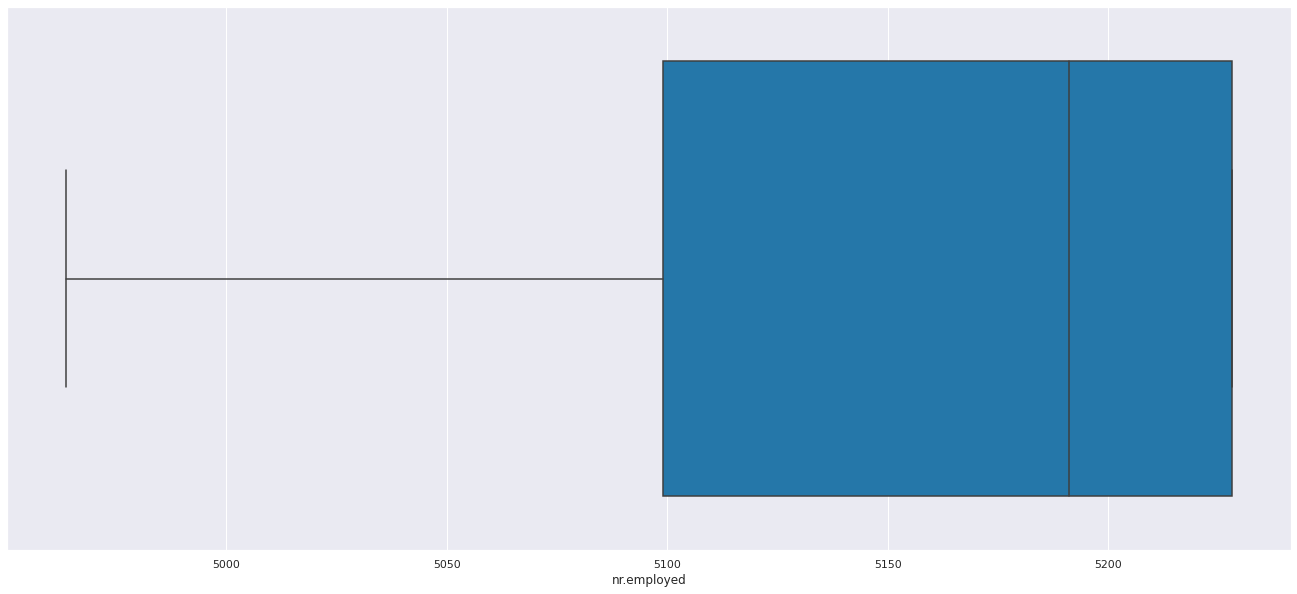

In [ ]:
sns.boxplot(x='nr.employed', palette = colors, data=df)
print(df['nr.employed'].describe())

La médiane se rapproche plus de la valeur maximale. Il n'y a pas des valeurs aberrantes mais les données ne sont pas normales.




count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


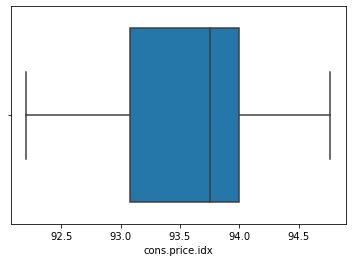

In [ ]:
sns.boxplot(x="cons.price.idx", palette = colors, data=df)
print(df['cons.price.idx'].describe())

Distribution des données semble plutôt normale, mais la différence entre la mediane et la moyenne dans ce contexte n'est pas négligeable. 

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


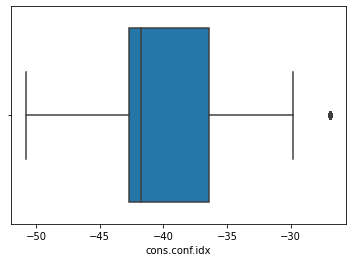

In [ ]:
sns.boxplot(x="cons.conf.idx", palette = colors, data=df)
print(df['cons.conf.idx'].describe())

Valeur aberrante retrouvé. La distribution semble assez symétrique, mais la différence entre la mediane et la moyenne dans ce contexte n'est pas négligeable.

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


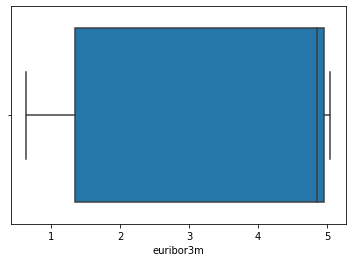

In [ ]:
sns.boxplot(x="euribor3m", palette = colors, data=df)
print(df['euribor3m'].describe())

La moyenne et la médiane sont assez éloignées, les valeurs ne sont pas normalement distribuées et la médiane est la meilleure représentation.

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


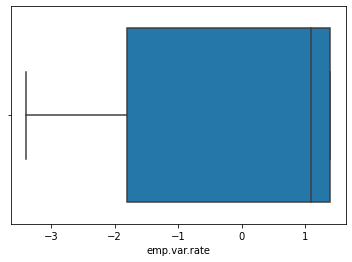

In [ ]:
sns.boxplot(x="emp.var.rate", palette = colors, data=df)
print(df['emp.var.rate'].describe())

La médiane se rapproche plus de la valeur maximale. Il n'y a pas des valeurs aberrantes mais les données ne sont pas normales.

## B - Variables explicatives vs cible

###1 -  Variables socio-démographiques

**AGE / DEPOSIT**

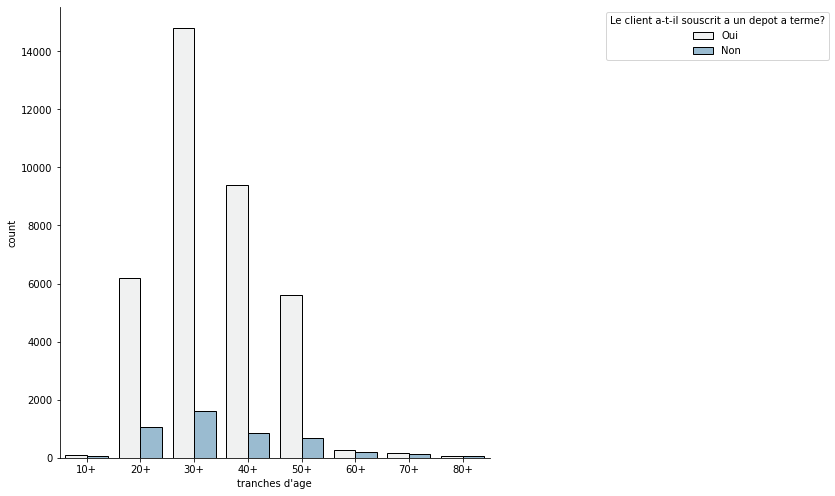

In [ ]:
#@title
df['age_cut'] = pd.cut(x=df['age'], bins = [10,20,30,40,50,60,70,80,90], labels = ['10+','20+','30+','40+','50+','60+','70+','80+'])

sns.catplot(x= 'age_cut', hue="deposit", kind="count", data=df, height=7, legend = False,color = '#91BDD9',edgecolor='black', linewidth=1)
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.8,1))
plt.xlabel("tranches d'age");


L'age median du client ayant effectué un deposit est d'environ 37 ans. Les trentenaires sont les plus nombreux à avoir effectué un dépot à terme mais en proportion ce sont les 50 ans et + qui sont plus sousceptible à souscrire versus ne pas souscrire.

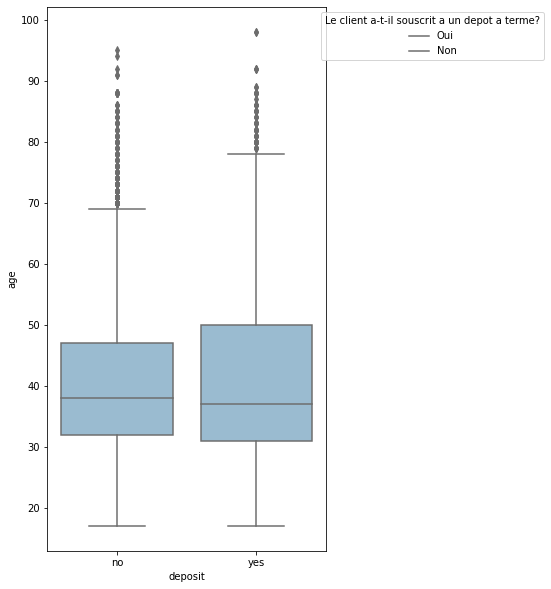

In [ ]:
#@title
plt.figure(figsize=(5,10))

sns.boxplot(x= 'deposit', y='age',data=df,color = '#91BDD9')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.8,1));



**EDUCATION / DEPOSIT**

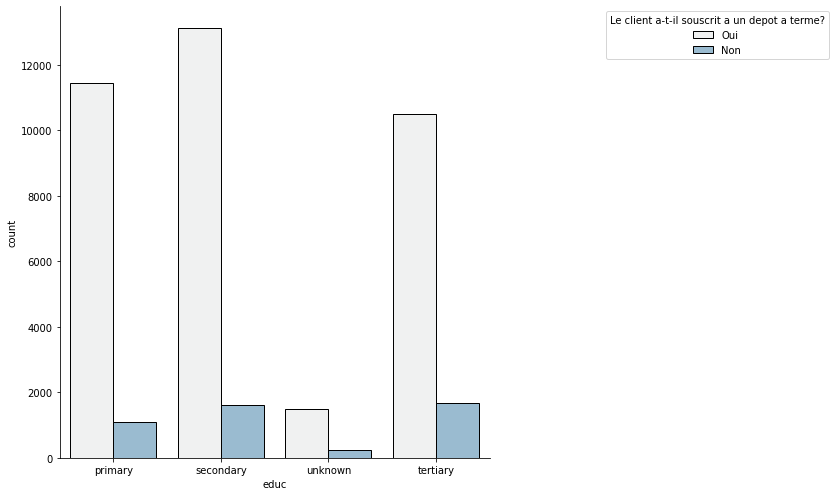

In [ ]:
#@title
sns.catplot(x= 'educ', hue="deposit", kind="count", data=df, height=7, legend = False,color = '#91BDD9',edgecolor='black', linewidth=1)
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.8,1));


Le nombre de clients ayant souscrit un dépôt à terme est à peu près équivalente entre les niveaux d'éducation (sauf 'unknown'), cependant le taux de 'Oui' est plus important pour les personnes ayant un niveau d'éducation 'tertiary'.

**JOB / DEPOSIT**

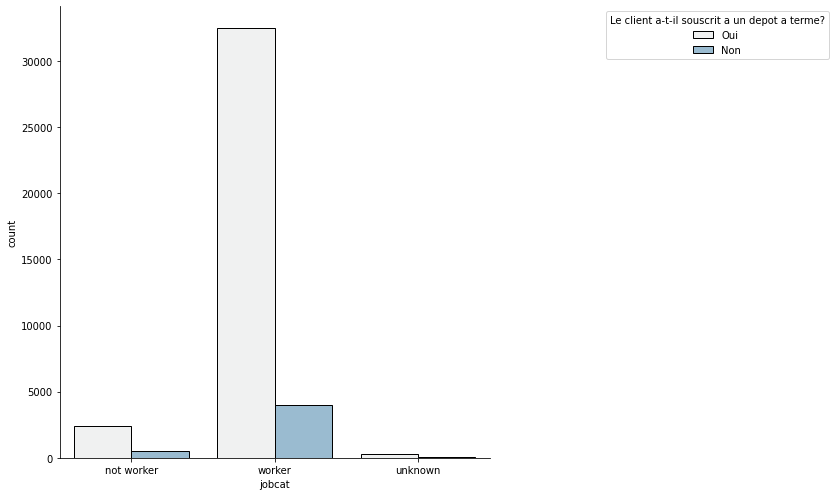

In [ ]:
#@title
def term_job(cell):
    if  'admin.' in cell:
        return 'worker'
    elif 'technician' in cell:
        return 'worker'
    elif'services' in cell:
        return 'worker'
    elif'management' in cell:
        return 'worker'
    elif'blue-collar' in cell:
        return 'worker'
    elif'self-employed' in cell:
        return 'worker'
    elif'retired' in cell:
        return 'worker'
    elif'unemployed' in cell:
        return 'not worker'
    elif'housemaid' in cell:
        return 'not worker'
    elif'student' in cell:
        return 'not worker'
    elif'unknown' in cell:
        return 'unknown'
    return

df['jobcat'] = df['job'].apply(term_job);

sns.catplot(x="jobcat", hue="deposit", kind="count", data=df, height=7, legend = False,color = '#91BDD9',edgecolor='black', linewidth=1)
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.8,1));

Nous pouvons observer que le groupe des clients ayant un emploi est beaucoup plus important que pour les groupes sans-emploi et inconnu. Possible corrélation à verifier. 

**MARITAL / DEPOSIT**

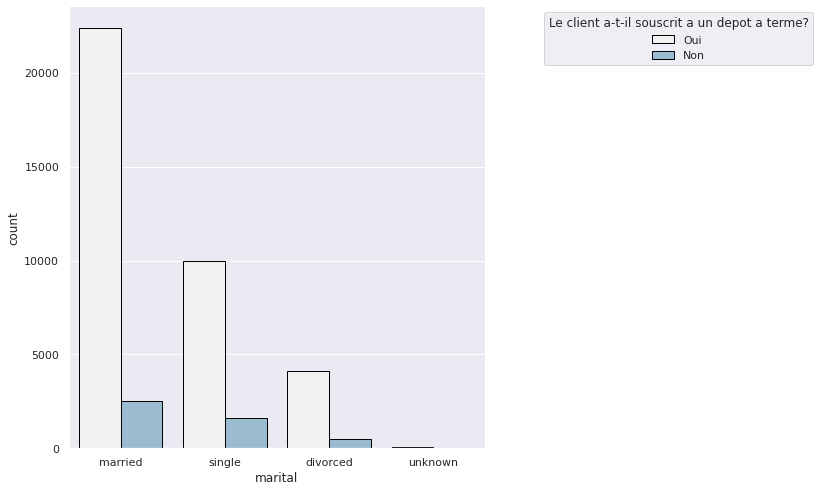

In [ ]:
sns.catplot(x= 'marital', hue="deposit", kind="count", data=df, height=7, legend = False,color = '#91BDD9',edgecolor='black', linewidth=1)
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.8,1));


Les clients mariés sont les plus nombreux à avoir souscrit à un dépôt à terme, cependant il semble y avoir une propostionalité de souscription/non-souscription dans les différents groupes.

### 2 - Variables financiéres 

**LOAN / DEPOSIT**

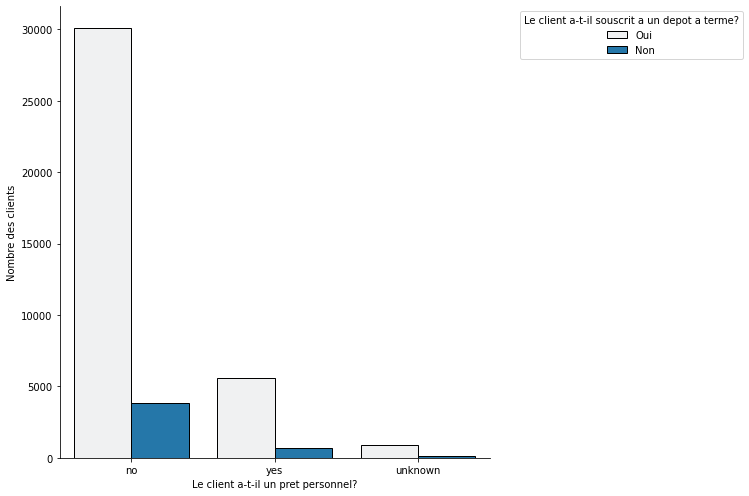

In [ ]:
#@title
figsize = (50,50)
sns.catplot(x="loan", hue="deposit", kind="count", data=df, height=7, legend = False, edgecolor='black', color = '#0F7CBF')
plt.xlabel('Le client a-t-il un pret personnel?')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Nous observons que le groupe des clients n'ayant pas déjà un prêt bancaire compte plus de souscripteurs que les autres groupes. Possible corrélation à verifier. 

Les variables loan et deposit sont inexistantes.

**HOUSING / DEPOSIT**



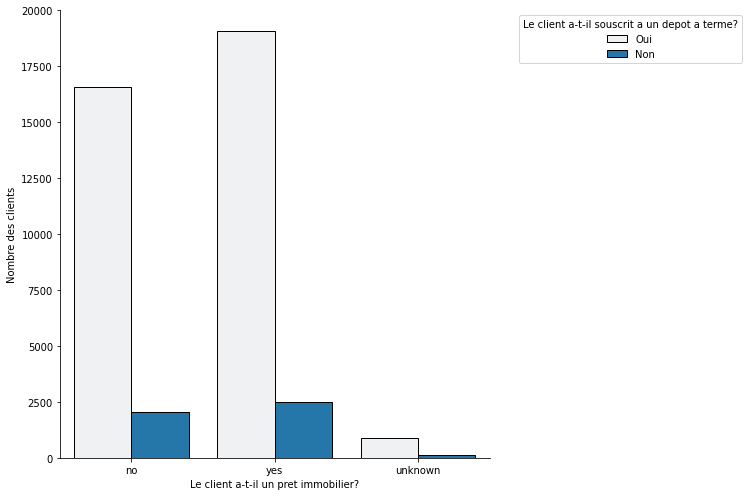

In [ ]:
#@title
figsize = (50,50)
sns.catplot(x="housing", hue="deposit", kind="count", data=df,color = '#0F7CBF', height=7,edgecolor='black', legend = False)
plt.xlabel('Le client a-t-il un pret immobilier?')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Les groupes et le fait de souscrire ou non à un dépôt semble proportionnelles, même si les clients du groupe ayant un prêt immobillier ont été plus nombreux à souscrire à un dépot. Corrélation à vérifier. 

**DEFAULT / DEPOSIT**


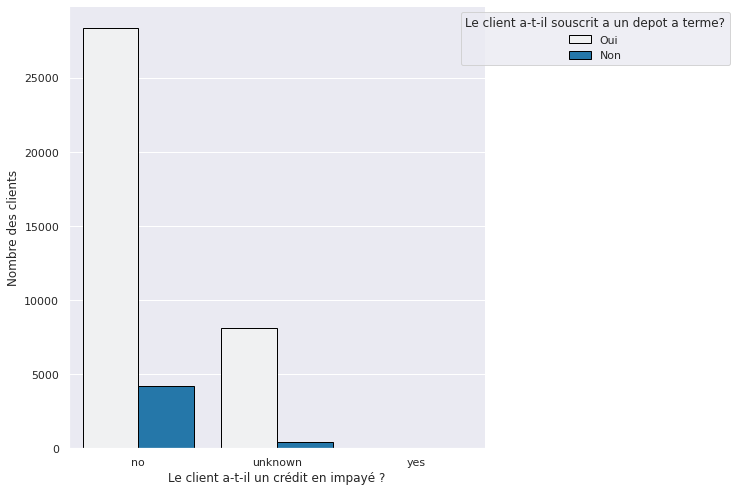

In [ ]:
#@title
figsize = (20,20)
sns.catplot(x="default", hue="deposit", kind="count", data=df, color = '#0F7CBF', height=7, edgecolor='black', legend = False)
plt.xlabel('Le client a-t-il un crédit en impayé ?')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

On observe qu'aucun client ayant déjà un crédit non payé n'as souscrit à un dépot. Cepedant, parmis les groupes 'no' et 'unknown' le taux de souscripteurs et non souscripteurs semble proportionnel. 

###3 - Variables de campagne


**CONTACT / DEPOSIT**

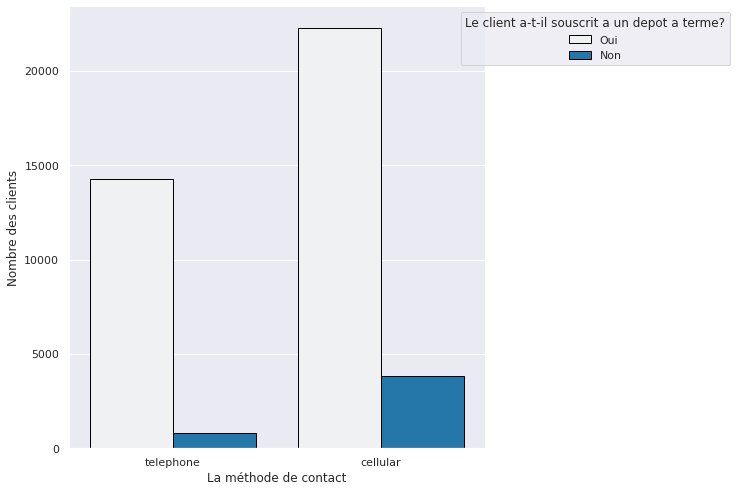

In [ ]:
figsize = (20,20)
sns.catplot(x="contact", hue="deposit", kind="count", data=df, color = '#0F7CBF', height=7, edgecolor='black', legend = False)
plt.xlabel('La méthode de contact')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Les clients contactés par téléphone mobile sont les plus nombreux à avoir souscrit à un dépôt. Nous observons cependant une proportionnalité de souscripteurs/non-souscripteurs parmis les deux groupes. 

**MONTH / DEPOSIT**

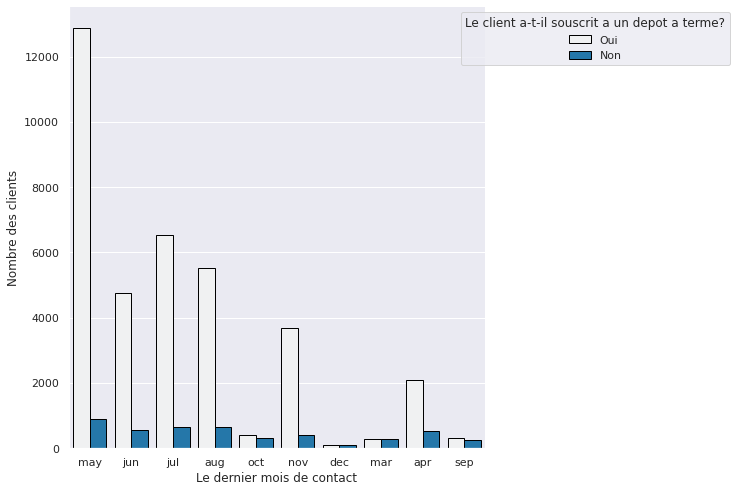

In [ ]:
sns.catplot(x="month", hue="deposit", kind="count", data=df, color = '#0F7CBF', height=7, edgecolor='black', legend = False)
plt.xlabel('Le dernier mois de contact')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));


Les clients dont le dernier contact a eu lieu en mai sont largement plus nombreux à avoir souscrir à un dépôt à terme. Corrélation possible à tester. 

**DAY OF WEEK / DEPOSIT**

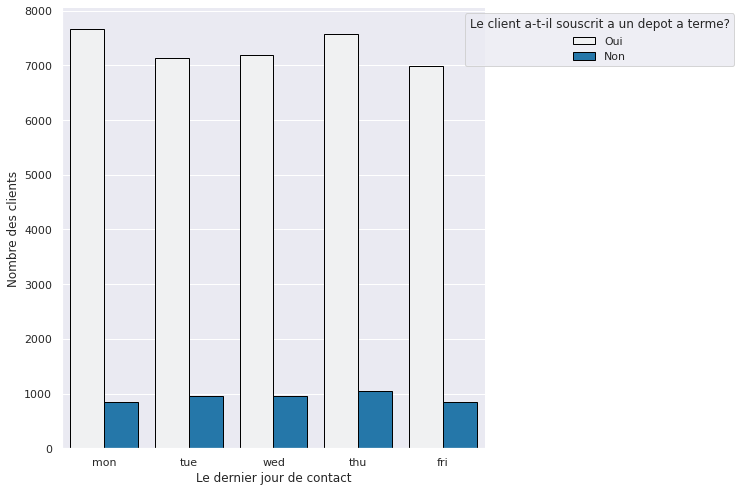

In [ ]:
sns.catplot(x="day_of_week", hue="deposit", kind="count", data=df, color = '#0F7CBF', height=7, edgecolor='black', legend = False)
plt.xlabel('Le dernier jour de contact')
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme?', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Le nombre de clients ayant souscrit ou non à un prêt semble cohérent entre les derniers jours où le client a été contacté, donc pas de corrélation visible.

**POUTCOME / DEPOSIT**

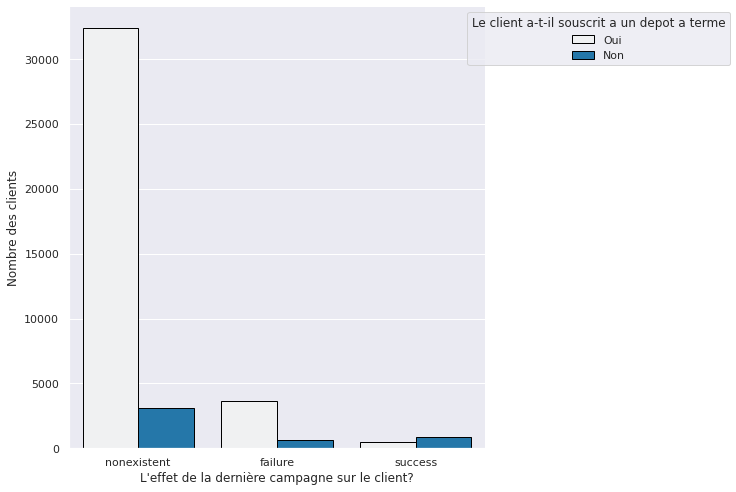

In [ ]:
#@title
figsize = (20,20)
sns.catplot(x="poutcome", hue="deposit", kind="count", data=df, color = '#0F7CBF', height=7, edgecolor='black', legend = False)
plt.xlabel("L'effet de la dernière campagne sur le client?")
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Les client n'ayant pas été ciblés par la dernière campagne publicitaire de la banque constituent la majorité de dépôts à terme, contrairement à ceux qui ont déjà été ciblé par la campagne. Les clients pour qui cette dernière campagne a été consideré comme succès sont les moins nombreux à souscrire. Possible corrélation à noter. 

**DAYS PASSED FROM PREVIOUS CAMPAIGN / DEPOSIT**


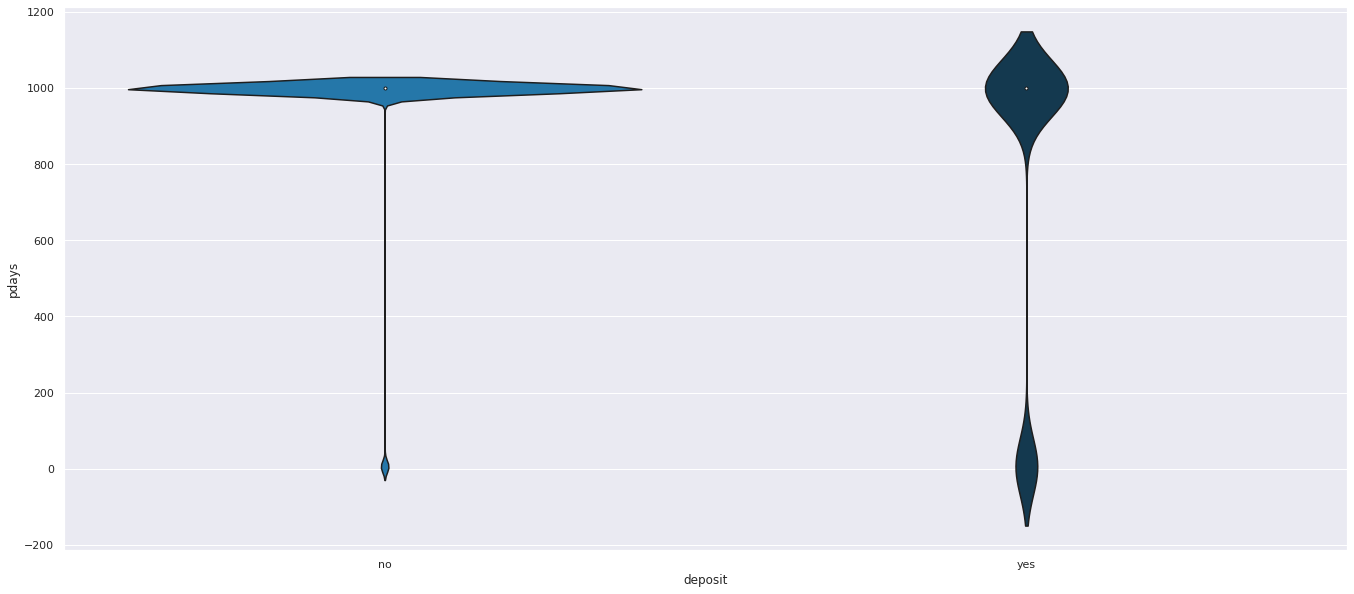

In [ ]:
#@title
sns.violinplot(x="deposit", y = 'pdays', palette = colors, data=df)

Distribution et corrélation difficile à observer.

**DURATION / DEPOSIT**


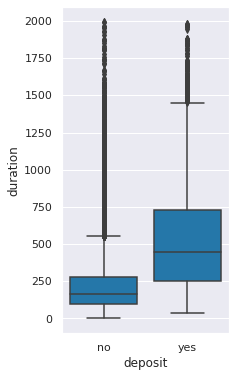

In [ ]:
#@title
plt.figure(figsize=(3,6))
sns.set(style="darkgrid")
sns.boxplot(x='deposit', y='duration', data=df[df['duration']<2000],color='#0F7CBF');



La durée de l'appel semble avoir un impact sur la souscription ou non au contrat de dépot à terme, la médiane et les quartiles de la variable 'duration' sont sensiblement supérieurs pour les 'yes'. Corrélation à tester. 

**PREVIOUS / DEPOSIT**

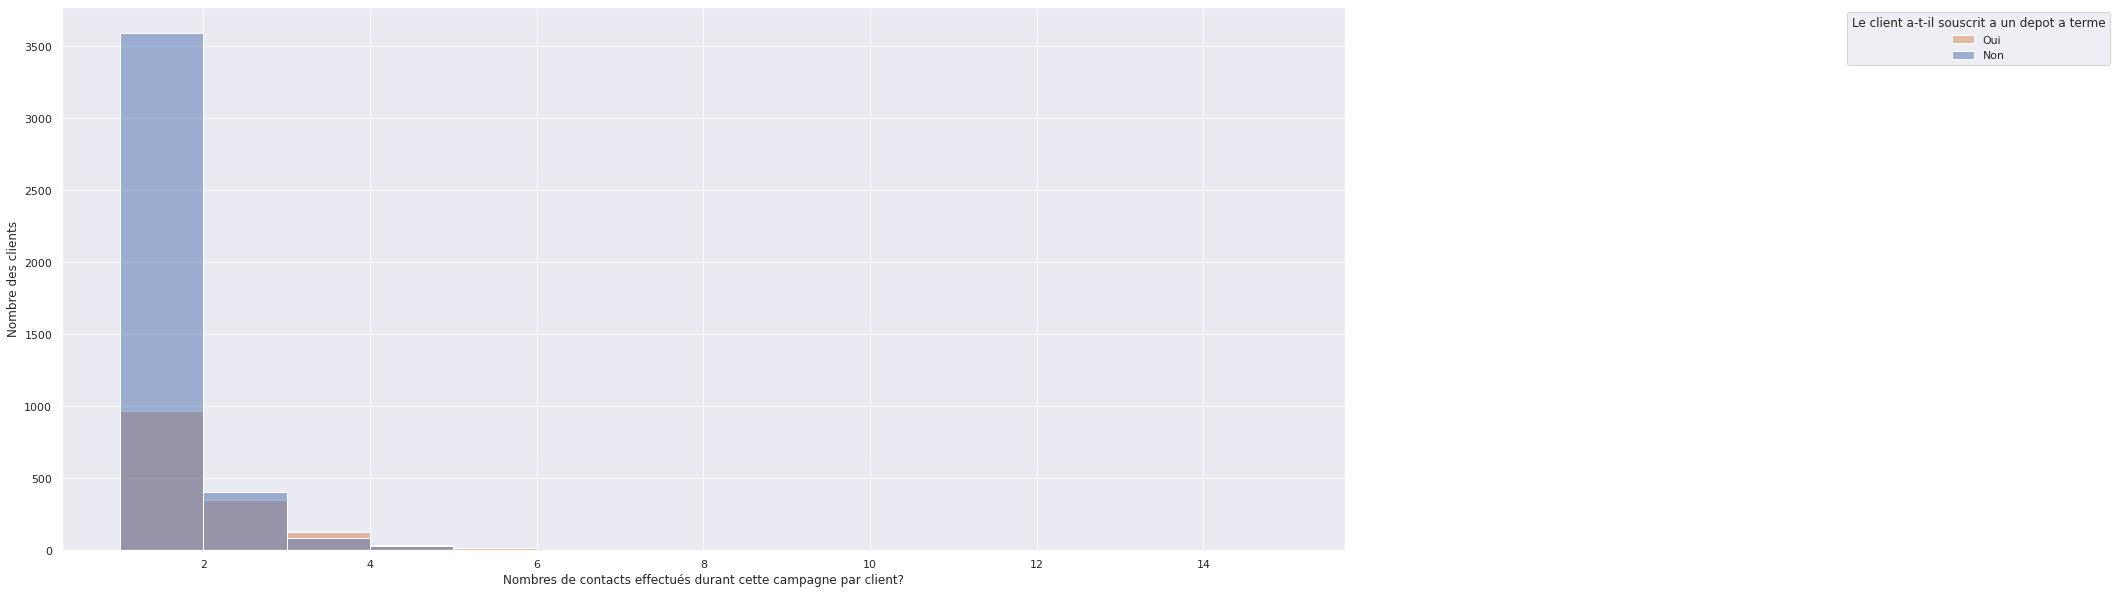

In [ ]:
#@title
sns.histplot(data = df[df['previous']<15], x="previous", hue="deposit", bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], color = '#07CBF');
plt.xlabel("Nombres de contacts effectués durant cette campagne par client?")
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

La proportion de personnes ayant effectué un deposit (vs ceux qui n'ont pas effectué de deposit) augmente à partir du 2ème contact durant la précédente campagne et au bout du 3ème contact la conversion est supérieure pour les personnes contactées une 3ème fois.


**CAMPAIGN / DEPOSIT**

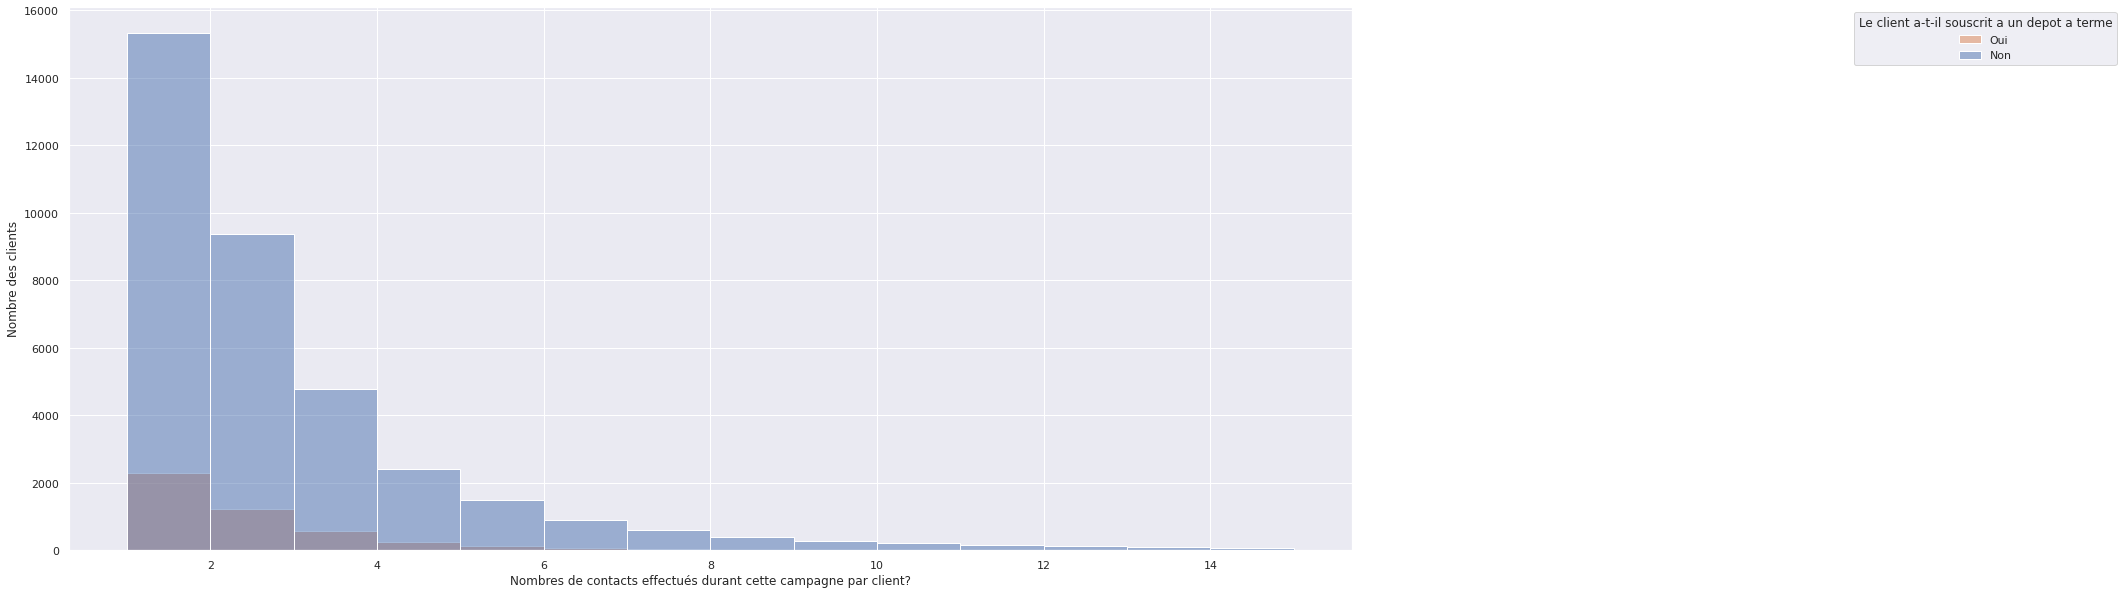

In [ ]:
sns.histplot(data = df[df['campaign']<15], x="campaign", hue="deposit", bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], color = '#07CBF');
plt.xlabel("Nombres de contacts effectués durant cette campagne par client?")
plt.ylabel('Nombre des clients')
plt.legend(title='Le client a-t-il souscrit a un depot a terme', loc='upper right', labels=['Oui', 'Non'], bbox_to_anchor= (1.6,1));

Durant la campagne actuelle, la proportion de souscription à un contrat à terme reste environ constante pour 1, 2, 3, 4 appels (~10%) puis baisse.

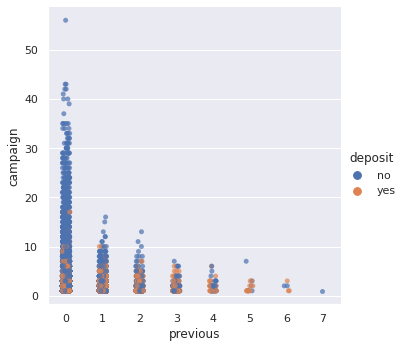

In [ ]:
#@title
sns.catplot(x='previous',y='campaign', data=df, hue='deposit', alpha=0.7);


###4 - Variables socio-démographiques

**EMPLOYEE VARIATION RATE / DEPOSIT**

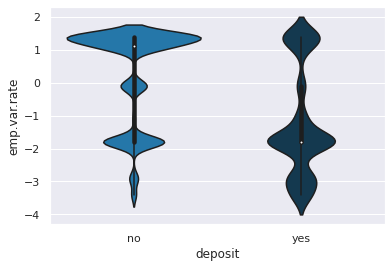

In [ ]:
sns.violinplot(x="deposit", y = 'emp.var.rate', palette = colors, data=df)

Il semblerai que le taux d'emploi pourrait avoir une influence sur les souscriptions aux dépots. Une importante partie des personnes qui n'ont pas souscris à un dépot se retrouvent au dessus d'un taux de 0, et cela s'inverse pour les gens ayant souscrit à un depôt. A confirmer par un test de correlation.

**CONSUMER PRICE INDEX / DEPOSIT**

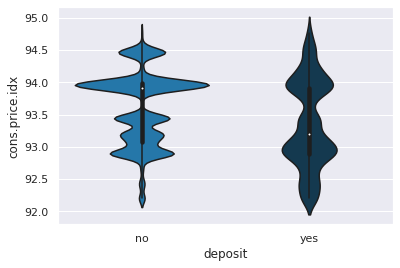

In [ ]:
sns.violinplot(x="deposit", y = 'cons.price.idx', palette = colors, data=df)

Le graphique ne semble pas indiquer de corrélation entre l'index du prix et la variable cible, mais à voir les tests.

**CONSUMER CONFIDENCE INDEX / DEPOSIT**

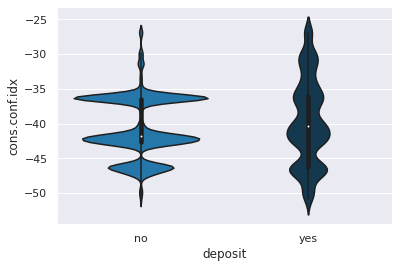

In [ ]:
sns.violinplot(x="deposit", y = 'cons.conf.idx', palette = colors, data=df)

Distribution anormale pour les personnes n'ayant pas souscrit pour un dépot. Difficile à observer une corrélation. 

**TAUX EURIBOR 3 MOIS / DEPOSIT**

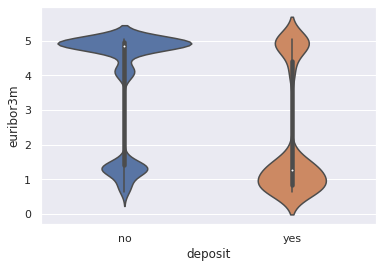

In [ ]:
sns.violinplot(x="deposit", y = 'euribor3m', data=df)

Distribution presque inversée entre les personnes ayant souscrit à un dépot et les personne n'ayant pas. Une corrélation est possible, à verifier avec les tests. 

**NOMBRE D'EMPLOYÉES / DEPOSIT**

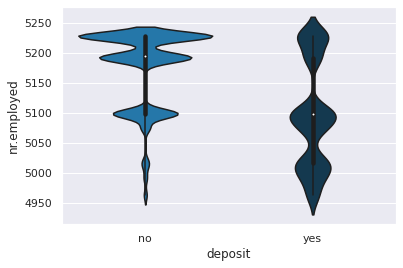

In [ ]:
sns.violinplot(x="deposit", y = 'nr.employed', palette = colors, data=df)

Distribution anormale pour les personnes ayant et n'ayant pas souscrit pour un dépot. Difficile à observer une corrélation pour l'instant. 

## C - Tests de corrélation

Dans cette partie nous analyserons les corrélations entre les variables explicatives et la variable cible. 
Nous posons l'hypothése H0: 'La variable explicative et la variable cible sont indépendantes' pour l'ensemble des données afin d'éviter les répetions. 

Création du df.corr, dataframe à utilisation unique sur le tests de corrélation. 



In [ ]:
df_corr = df.drop(['educ', 'month_modif', 'week', 'date_complete', 'age_cut', 'jobcat'], axis = 1)
df_corr.rename({'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx',
                'nr.employed': 'nr_employed'}, axis = 1, inplace = True)


### 1 - Le Dataframe

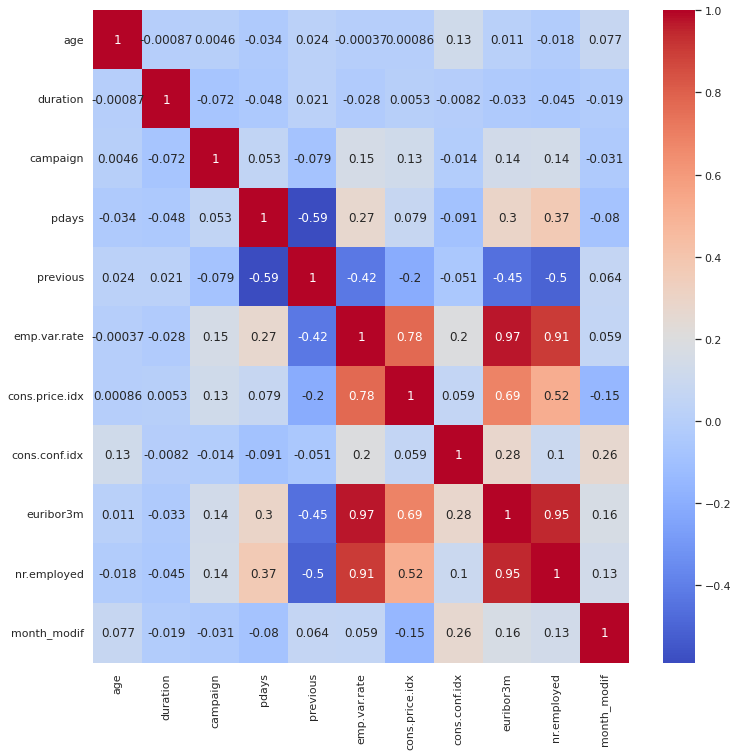

In [ ]:
cor = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

Première visualisation du niveau de corrélation sur l'ensemble de données du dataset en utilisant le Test de Pearson. Nous observons une très forte corrélation entre les variables du contexte socio-économique. 

### 2 - Variables socio-démographiques 

**AGE**

In [ ]:
table = pd.crosstab ( df ['age_cut'] ,df ['deposit'], normalize =0)
print(table)

deposit        no       yes
age_cut                    
10+      0.592857  0.407143
20+      0.852685  0.147315
30+      0.902533  0.097467
40+      0.918262  0.081738
50+      0.893461  0.106539
60+      0.565574  0.434426
70+      0.528053  0.471947
80+      0.504587  0.495413


In [ ]:
result_age = statsmodels.formula.api.ols('emp_var_rate ~ deposit', data=df_corr).fit()
agean = statsmodels.api.stats.anova_lm(result_age)
agean

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,9046.842163,9046.842163,4023.829925,0.0
Residual,41186.0,92599.152609,2.248316,NaN,NaN


**EDUCATION:**

In [ ]:
table2=pd.crosstab(df_corr['education'],df_corr['deposit'])


resultats_test=chi2_contingency(table2)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

193.10590454149565 3.3051890144025054e-38 7


In [ ]:
def V_Cramer(table2, N):
    stat_chi2 = chi2_contingency(table2)[0]
    k = table2.shape[0]
    r = table2.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table2, df.shape[0])

0.06722019964714289

p-value<5% donc on ne peut conclure sur l'indépendance des variables 'education' et 'deposit'. Cependant, le V-Cramer est très faible donc la corrélation entre ces variables est très faible.

In [ ]:
pd.DataFrame(pearsonr(df['duration'], df['nr.employed']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,-4.470322e-02
p-value,1.119127e-19


###**3** - Variables financiéres

**LOAN**

In [ ]:
lode = pd.crosstab(df['loan'],df['deposit'])


resultats_test=chi2_contingency(lode)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)


1.094027551150338 0.5786752870441754 2


In [ ]:
def V_Cramer(lode, N):
    stat_chi2 = chi2_contingency(lode)[0]
    k = lode.shape[0]
    r = lode.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(lode, df.shape[0])

0.0

p-value >5% les variables loan et deposit sont indépendantes. Le V_Cramer confirme l'indépendance.

**HOUSING**

In [ ]:
hable=pd.crosstab(df['housing'],df['deposit'])

from scipy.stats import chi2_contingency
resultats_test=chi2_contingency(hable)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

5.684495858974168 0.05829447669453452 2


p-value >5%, les variables loan et deposit sont indépendantes. 

In [ ]:
def V_Cramer(hable, N):
    stat_chi2 = chi2_contingency(hable)[0]
    k = hable.shape[0]
    r = hable.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(hable, df.shape[0])

0.009458147765830698

Le V de Cramer révele une corrélation êxtremement faible entre les variables housing et deposit, elle est donc négligeable.


**DEFAULT**

In [ ]:
dede=pd.crosstab(df['deposit'],df['default'])

resultats_test=chi2_contingency(dede)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

406.5775146420093 5.1619579513916376e-89 2


p-value >5%, les variables default et deposit sont indépendantes. 

In [ ]:
def V_Cramer(dede, N):
    stat_chi2 = chi2_contingency(dede)[0]
    k = dede.shape[0]
    r = dede.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(dede, df.shape[0])


0.09911075061369182

Le V de Cramer révele une corrélation êxtremement faible entre les variables default et deposit, elle est donc négligeable.

 Variable quantitative, nécessaire?
Le premier quartile a une part plus importante de "Yes"

In [ ]:
age_q = pd.qcut(df['age'], q=4)
age_deposit = pd.crosstab(age_q, df['deposit'])
age_deposit



deposit,no,yes
age,,
"(16.999, 32.0]",9648,1528
"(32.0, 38.0]",9004,995
"(38.0, 47.0]",9344,796
"(47.0, 98.0]",8552,1321


In [ ]:
job_contingence = pd.crosstab(df['job'],df['deposit'])
job_contingence

deposit,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [ ]:
marital_contingence = pd.crosstab(df['marital'],df['deposit'])
marital_contingence

deposit,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [ ]:
education_contingence = pd.crosstab(df['educ'],df['deposit'])
education_contingence

deposit,no,yes
educ,,
primary,11438,1093
secondary,13132,1626
tertiary,10498,1670
unknown,1480,251


### 4 - Variables concernant la campagne

**DURATION**

In [ ]:
result_dur = statsmodels.formula.api.ols('duration ~ deposit', data= df).fit()
table_dur = statsmodels.api.stats.anova_lm(result_dur)

table_dur

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,4.547710e+08,4.547710e+08,8094.101634,0.0
Residual,41186.0,2.314055e+09,5.618548e+04,NaN,NaN


la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse selon laquelle duration n'influe pas sur deposit

In [ ]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(job_contingence)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique,'et', p_valeur, 'et', degre_liberte)

961.2424403289555 et 4.189763287563623e-199 et 11


In [ ]:
resultats_test = chi2_contingency(marital_contingence)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique,'et', p_valeur, 'et', degre_liberte)

122.65515182252989 et 2.068014648442211e-26 et 3


### 5 - Variable concernant le contexte socio-économique

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

result_emp = statsmodels.formula.api.ols('emp_var_rate ~ deposit', data=df_corr).fit()
empe = statsmodels.api.stats.anova_lm(result_emp)
empe

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,9046.842163,9046.842163,4023.829925,0.0
Residual,41186.0,92599.152609,2.248316,NaN,NaN


la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse selon laquelle emp.var.rate n'influe pas sur deposit

In [ ]:
result_price = statsmodels.formula.api.ols('cons_price_idx ~ deposit', data=df_corr).fit()
prie = statsmodels.api.stats.anova_lm(result_price)
prie

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,256.037173,256.037173,778.589786,9.318965e-170
Residual,41186.0,13543.906156,0.328847,NaN,NaN


la p-value (PR(>F)) est superieur à 5% donc on accepte l'hypothèse selon laquelle cons_price_idx n'influe pas sur deposit



In [ ]:
result_conf = statsmodels.formula.api.ols('cons_conf_idx ~ deposit', data=df_corr).fit()
confe = statsmodels.api.stats.anova_lm(result_conf)
confe

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,2656.927417,2656.927417,124.409975,7.536665e-29
Residual,41186.0,879577.484094,21.356225,NaN,NaN


la p-value (PR(>F)) est superieur à 5% donc on accepte l'hypothèse selon laquelle cons_conf_idx n'influe pas sur deposit


In [ ]:
result_eur = statsmodels.formula.api.ols('euribor3m ~ deposit', data=df_corr).fit()
euri = statsmodels.api.stats.anova_lm(result_eur)
euri

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,11736.509666,11736.509666,4309.479048,0.0
Residual,41186.0,112166.663700,2.723417,NaN,NaN


la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse selon laquelle euribor3m n'influe pas sur deposit

In [ ]:
result_num = statsmodels.formula.api.ols('nr_employed ~ deposit', data=df_corr).fit()
num = statsmodels.api.stats.anova_lm(result_num)
num

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,2.704727e+07,2.704727e+07,5926.610646,0.0
Residual,41186.0,1.879605e+08,4.563700e+03,NaN,NaN


la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse selon laquelle nr.employed n'influe pas sur deposit

________________________________________

Le V_Cramer n'est pas très élevé / Pas une forte corrélation entre les deux variables mais pas non plus négligeable.

In [ ]:
def V_Cramer(job_contingence, N):
    stat_chi2 = chi2_contingency(job_contingence)[0]
    k = job_contingence.shape[0]
    r = job_contingence.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(job_contingence, df.shape[0])



0.1518927590318406

Le V_Cramer très faible / Pas une forte corrélation entre les deux variables

In [ ]:
def V_Cramer(marital_contingence, N):
    stat_chi2 = chi2_contingency(marital_contingence)[0]
    k = marital_contingence.shape[0]
    r = marital_contingence.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(marital_contingence, df.shape[0])



0.05389959341461882

Le V_Cramer faible / Pas une forte corrélation entre les deux variables mais pas non plus négligeable.

In [ ]:
def V_Cramer(education_contingence, N):
    stat_chi2 = chi2_contingency(education_contingence)[0]
    k = education_contingence.shape[0]
    r = education_contingence.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(education_contingence, df.shape[0])



0.06437872516865252

###5 - ANOVA


Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

- H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
- H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,deposit,educ,month_modif,week,date_complete,age_cut,jobcat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,primary,5,,2020-05-04,50+,not worker
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,secondary,5,,2020-05-04,50+,worker
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,secondary,5,,2020-05-04,30+,worker
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,primary,5,,2020-05-04,30+,worker
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,secondary,5,,2020-05-04,50+,worker


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_df = pd.DataFrame(columns=['variable'])

# ANOVA Test 
lst = ['age','duration','campaign','pdays','previous',]

new_row=0
for item in lst:
    mod = ols('{} ~ deposit'.format(item), data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=1)
    anova_df=anova_df.append(aov_table)
    anova_df.iloc[[new_row-1], [0]] = item
    anova_df.iloc[[new_row-2], [0]] = item

anova_df.reset_index(inplace = True)
anova_df = anova_df.rename(columns={'index': '-'})
anova_df.head(100)

,-,variable,df,sum_sq,mean_sq,F,PR(>F)
0,deposit,age,1.0,4.133451e+03,4.133451e+03,38.094659,6.802136e-10
1,Residual,age,41186.0,4.468876e+06,1.085047e+02,NaN,NaN
2,deposit,duration,1.0,4.547710e+08,4.547710e+08,8094.101634,0.000000e+00
3,Residual,duration,41186.0,2.314055e+09,5.618548e+04,NaN,NaN
4,deposit,campaign,1.0,1.391563e+03,1.391563e+03,182.156673,2.007780e-41
5,Residual,campaign,41186.0,3.146353e+05,7.639374e+00,NaN,NaN
6,deposit,pdays,1.0,1.519034e+08,1.519034e+08,4861.173272,0.000000e+00
7,Residual,pdays,41186.0,1.286993e+09,3.124831e+04,NaN,NaN
8,deposit,previous,1.0,5.344855e+02,5.344855e+02,2304.257088,0.000000e+00
9,Residual,previous,41186.0,9.553326e+03,2.319557e-01,NaN,NaN


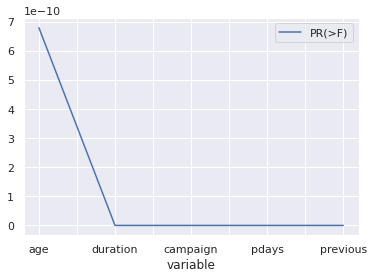

In [ ]:
df_mask=anova_df['-']=='deposit'
filtered_df = anova_df[df_mask]
filtered_df.head(100)


filtered_df.plot(x="variable", y=["PR(>F)"]);
plt.rcParams["figure.figsize"] = (23,10);
plt.show();

In [ ]:
result = statsmodels.formula.api.ols('pdays ~ deposit', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
deposit,1.0,1.519034e+08,1.519034e+08,4861.173272,0.0
Residual,41186.0,1.286993e+09,3.124831e+04,NaN,NaN


La varaible Age est la seule variable qui semble être correlée à depsosit sur ce test

# **II - PREPROCESSING**


In [ ]:
df_ml = pd.DataFrame(data=df)


df_ml.drop(columns = ['date_complete', 'age_cut','educ','month_modif','week','jobcat'], inplace = True)


df_ml.info()
df_ml.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Variables quantitatives

In [ ]:
df_num = df_ml.select_dtypes(include=['int64', 'float64']).columns

scaler = preprocessing.StandardScaler().fit(df_ml[df_num])

df_ml[df_num] = pd.DataFrame(scaler.transform(df_ml[df_num]))

In [ ]:
df_ml.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Variables qualitatives

In [ ]:
df_cat = df_ml.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in df_cat:
    df_ml[feat] = le.fit_transform(df_ml[feat].astype(str))


In [ ]:
for col in df_cat:
    print(f"{col} has {df_ml[col].unique()} values\n")

job has [ 3  7  0  1  9  5  4 10  6 11  2  8] values

marital has [1 2 0 3] values

education has [0 3 1 2 5 7 6 4] values

default has [0 1 2] values

housing has [0 2 1] values

loan has [0 2 1] values

contact has [1 0] values

month has [6 4 3 1 8 7 2 5 0 9] values

day_of_week has [1 3 4 2 0] values

poutcome has [1 0 2] values

deposit has [0 1] values



In [ ]:
df_ml.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,1.533034,3,1,0,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,...,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(Pour nous) Suite à la standardisation des variables numériques et à l'utilisation du labelEncoder, la variable 'deposit' est de type 'int64'. Les classes 'oui', 'non' sont devenues '1', '0'.

In [ ]:
target = df_ml['deposit']
feats = df_ml.drop('deposit',axis=1)

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=12)

# **III - Machine Learning**

##A- ML SANS OverSlamping

Méthode de classification KNN (7min)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
knn=KNeighborsClassifier()
params_knn={'n_neighbors': [k for k in range(1,10)], 'metric':['minkowski','manhattan','chebyshev']}

gridcv = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='accuracy', cv=3)
gridcv.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(gridcv.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

In [ ]:
gridcv.best_params_

In [ ]:
knn_m = neighbors.KNeighborsClassifier(n_neighbors=9, metric='minkowski')
knn_m.fit(X_train, y_train)

y_pred = knn_m.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(knn_m.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Suite à l'application du modèle KNN et de ses hyperparamètres, nous pouvons constater un score élevé de 0,90. Cependant, les métriques du modèle nous montre que la catégorie 1 de notre variable cible est difficilement détectable avec un F1 score de 0,46. Cela peut être dû à un déséquilibre important dans notre variable 'deposit'. Pour remédier à cela, nous allons effectuer un échantillonage avec la méthode de l'oversampling. 

##B- ML AVEC OverSlamping

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

#Importing SMOTE
from imblearn.over_sampling import SMOTE

#Oversampling the data
smote = SMOTE(random_state = 101)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

La méthode d'oversampling utilisée est le 'Smote' 

###1- KNN (24min36s)


In [ ]:
knn=KNeighborsClassifier()
params_knn={'n_neighbors': [k for k in range(1,10)], 'metric':['minkowski','manhattan','chebyshev']}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='accuracy', cv=3)
grid_knn.fit(X_train_over,y_train_over)

In [ ]:
grid_knn.best_params_

In [ ]:
y_pred_knn = grid_knn.predict(X_test)
pd.crosstab(y_test, y_pred_knn, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(grid_knn.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))

Après l'application de l'oversampling avec la méthode 'Smote', le score a légèrement baissé à 0,87. Les métriques 'recall' et 'F1 score' pour la catégorie 1 sont meilleures, néanmoins, en dessous du seuil attendu (0,60). En ayant essayé plusieurs méthodes d'échantillonage, nous allons rester sur celui du 'Smote' qui a eu les résultats les plus probants. 

In [ ]:
KNNCV=93
KNNCV_F1=49

###2- DecisionTree (17min33s)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
params_dtree = {'criterion' : ['gini', 'entropy'],
                'max_depth' : range(1,10),
                'min_samples_split' : range(1,10),
                'min_samples_leaf' : range(1,5)}

grid_dtree = GridSearchCV(estimator=dtree, param_grid=params_dtree, cv=10, verbose=1, n_jobs=-1 )
grid_dtree.fit(X_train_over,y_train_over)

In [ ]:
grid_dtree.best_params_

In [ ]:
dtree2 = DecisionTreeClassifier()

In [ ]:
y_pred_dtree = grid_dtree.predict(X_test)
pd.crosstab(y_test, y_pred_dtree, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(grid_dtree.score(X_test, y_test))
print(classification_report(y_test, y_pred_dtree))

In [ ]:
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

DTREECV=92
DTREECV_F1=59

#plt.figure(figsize=(15,12))
#plot_tree(grid_dtree, feature_names = X_train_over.columns.tolist(), filled=True); #proportion=True

###3 - SVM (OK mais hypeprametre 7 min)


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
svm = SVC()
param_svm = {}

#param_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_svm = GridSearchCV(SVC(), param_grid=param_svm, refit = True, verbose =2)
grid_svm.fit(X_train_over, y_train_over)

In [ ]:
grid_svm.best_params_

In [ ]:
y_pred_svm = grid_svm.predict(X_test)
pd.crosstab(y_test, y_pred_svm, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(grid_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred_svm))

In [ ]:
SVCCV=91.0
SVCCV_F1=57

###4- Random Forest (14min45s)

In [ ]:
from sklearn import ensemble
from sklearn import model_selection

In [ ]:
RFC = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)

param_rfc = { 'n_estimators': [200, 700],
              'max_features': ['auto', 'sqrt', 'log2']}

grid_rfc = GridSearchCV(estimator=RFC, param_grid=param_rfc, cv= 5)
grid_rfc.fit(X_train_over, y_train_over)


In [ ]:
grid_rfc.best_params_

In [ ]:
y_pred_rfc = grid_rfc.predict(X_test)
pd.crosstab(y_test, y_pred_rfc, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(grid_rfc.score(X_test, y_test))
print(classification_report(y_test, y_pred_rfc))

In [ ]:
RFCCV=95
RFCCV_F1=63

Avec un score de 0,90 et un F1 score de 0,63 pour la prédiction de la classe '1', le random forest est l'une des méthodes de machine learning la plus adapté à notre dataset.

### 5- XGboost (NOK)

In [ ]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
XGB = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42 )

param_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05] }


In [ ]:
#grid_xgb = GridSearchCV(estimator=XGB, param_grid=param_xgb, scoring = 'roc_auc', n_jobs = 10, cv = 10, 
#                          verbose=True)
#grid_xgb.fit(X_train_over, y_train_over)

In [ ]:
grid_xgb = GridSearchCV(estimator=XGB, param_grid=param_xgb, scoring = 'roc_auc', 
                           verbose=True)
grid_xgb.fit(X_train_over, y_train_over)

In [ ]:
grid_xgb.best_params_

In [ ]:
y_pred_xgb = grid_xgb.predict(X_test)
pd.crosstab(y_test, y_pred_xgb, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(grid_xgb.score(X_test, y_test))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
XGB=95
XGB_F1=63

### - **Evaluation des modèles**

In [ ]:
#https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall#CHOOSED-MODEL-ANALYSIS

#SVCCV=0
#KNNCV=0
LOGCV=0
#XGB=0

#DTREECV_F1=0
#KNNCV_F1=0
#SVCCV_F1=0
LOGCV_F1=0
#RFCCV_F1=0
#XGB_F1=0

models = pd.DataFrame({
                'Models': ['Decision Tree Classifier','K-Near Neighbors','Support Vector Machine','Random Forest Classifier', 'XGBoost',],
                'Accuracy':  [DTREECV,KNNCV,SVCCV,RFCCV,XGB],
                'F1_Score':  [DTREECV_F1,KNNCV_F1,SVCCV_F1,RFCCV_F1,XGB_F1],
                })

models.sort_values(by='Accuracy', ascending=False)

#**IV - Interprétation des modèles**

## - Installation

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc

!pip install shap

import shap

from IPython.display import display
%matplotlib inline

In [ ]:
explainer = shap.TreeExplainer(svm)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(solver='liblinear', max_iter=1000)

lr.fit(X_train_scaled, y_train)

print("Validation Mean F1 Score: ", cross_val_score(
    lr, X_train, y_train, cv=5, scoring='f1_macro').mean())

print("Validation Mean Accuracy: ", cross_val_score(
    lr, X_train, y_train, cv=5, scoring='accuracy').mean())

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [ ]:
feat_importances = pd.Series(
    dtree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(3).plot(kind='barh');

In [ ]:
from sklearn.decomposition import PCA

n = X_train.shape[1]

pca = PCA(n_components=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_new = pca.fit_transform(X_train_scaled)

coeff = pca.components_.transpose()

xs = X_new[:, 0]
ys = X_new[:, 1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())


principalDf = pd.DataFrame({'PC1': xs*scalex, 'PC2': ys * scaley})

y_train_pred = lr.predict(X_train_scaled)
finalDF = pd.concat([principalDf, pd.Series(
    y_train_pred, name='income')], axis=1)


plt.figure(figsize=(13, 10))

sns.scatterplot(x='PC1', y='PC2', hue='income', data=finalDF, alpha=0.5)

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0]*1.5, coeff[i, 1]*1.5,
              color='k', alpha=0.5, head_width=0.01, )
    plt.text(coeff[i, 0]*1.5, coeff[i, 1] * 1.5, X_train.columns[i], color='k')

plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)

In [ ]:
pd.Series(lr.coef_[0], X_train.columns).sort_values(ascending=False).plot(kind='barh', figsize=(4,8));

##A - SHAP

### 1 - 1ère méthode: XGB

In [ ]:
%pip install shap
import shap


In [ ]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=4, min_child_weight=6, gamma=0.4, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27)
model_xgb = xgb.fit(X_train_over, y_train_over)
y_train_xgb = model_xgb.predict(X_train_over)
y_test_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test,y_test_xgb))
print(classification_report(y_test,y_test_xgb, digits=3))

print('Train accuracy: %0.3f' % accuracy_score(y_train_over, y_train_xgb))
print('Test accuracy: %0.3f' % accuracy_score(y_test, y_test_xgb))

print('Train AUC: %0.3f' % roc_auc_score(y_train_over, y_train_xgb))
print('Test AUC: %0.3f' % roc_auc_score(y_test, y_test_xgb))

In [ ]:
import shap
expl_xgb = shap.TreeExplainer(model_xgb)
shap_xgb = expl_xgb.shap_values(X_train_over)

In [ ]:
shap.summary_plot(shap_xgb, X_train_over, plot_type="bar")

In [ ]:
shap.summary_plot(shap_xgb, X_train_over)


In [ ]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[1050,:], X_train_over.iloc[1050,:], link='logit')

In [ ]:
shap.initjs()
shap.force_plot(expl_xgb.expected_value, shap_xgb[4000,:], X_train_over.iloc[4000,:], link='logit')

In [ ]:
# base value
y_train_over.mean()

In [ ]:
X_train_over.iloc[4000,]

###2 - 2nd methode: RFC

In [ ]:
rfc = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)
model_rfc = rfc.fit(X_train_over, y_train_over)
y_train_fc = model_rfc.predict(X_train_over)
y_test_rfc = model_rfc.predict(X_test)

In [ ]:
expl_rfc = shap.TreeExplainer(model_rfc)
shap_rfc = expl_rfc.shap_values(X_train_over)

In [ ]:
shap.summary_plot(shap_rfc, X_train_over, plot_type="bar")

In [ ]:
shap.summary_plot(shap_rfc, X_train_over)


## B- Skater


In [ ]:
!pip3 install git+https://github.com/oracle/Skater.git

#https://github.com/oracle/Skater/issues/287

In [ ]:
%pip install skater

In [ ]:
import skater
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
params = {'objective': 'binary:logistic', 'eval_metric':'logloss', 'max_depth': 6}
interpreter = Interpretation(X_train, feature_names=X_train.columns)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest =  xgb.DMatrix(data = X_test, label = y_test)

# Entraînement du modèle
bst = xgb.train(params, dtrain, 200)

def predict_xg(x):
    return pd.DataFrame(bst.predict(xgb.DMatrix(x)))

model = InMemoryModel(predict_xg, examples = X_train)

In [ ]:
probs = bst.predict(dtest)
preds = [0 if x < 0.5 else 1 for x in probs]

print(classification_report(y_test, preds))

In [ ]:
plt.rcParams['figure.figsize'] = (14,7)

plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [ ]:
interpreter.partial_dependence.plot_partial_dependence(['age'], model, grid_resolution=100,with_variance=True, figsize=(6, 4),progressbar=False);

In [ ]:
interpreter.partial_dependence.plot_partial_dependence(['duration'], model, grid_resolution=100,with_variance=True, figsize=(6, 4));

In [ ]:
interpreter.partial_dependence.plot_partial_dependence(['job'], model, grid_resolution=100,with_variance=True, figsize=(6, 4));

In [ ]:
interpreter.partial_dependence.plot_partial_dependence(['nr.employed'], model, grid_resolution=100,with_variance=True, figsize=(6, 4));

# XXXXX A SUP XXXX

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import decomposition, datasets
#from sklearn import tree
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score
###
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_auc_score


import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier




import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Tuning parameter for RF ( tuning parameters are choosen based on best parameters of RandomizedSearchCV)
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
tuning_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
tuning_rf.fit(X_train,y_train)
print('Best Parameter for Random Forest', tuning_rf.best_params_, tuning_rf.best_score_)

# Tuning parameter for Tree
param_dict= {"criterion": ['gini', 'entropy'],
            "max_depth": range(1,10),
            "min_samples_split": range(1,10),
            "min_samples_leaf": range(1,5)}
tuning_tree = GridSearchCV(DecisionTreeClassifier(random_state=12),  param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
tuning_tree.fit(X_train,y_train)
print('Best Parameter for Tree', tuning_tree.best_params_, tuning_tree.best_score_)

# Xgboost Parameters
param_xgb = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6],
 'gamma':[i/10.0 for i in range(0,5)]
}
tuning_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_xgb, scoring='roc_auc',n_jobs=4, cv=5)
tuning_xgb.fit(X_train,y_train)
print('Best Parameter for XGBoost', tuning_xgb.best_params_, tuning_xgb.best_score_)


In [ ]:
%%time
# Voting Classifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4= KNeighborsClassifier()
clf5= LinearDiscriminantAnalysis()
clf6= XGBClassifier()

# Instantiate the classfiers and make a list
classifiers = [LinearDiscriminantAnalysis(),
               KNeighborsClassifier(),
               GaussianNB(), 
               SVC(kernel='linear'),
               DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=9,min_samples_leaf=2, random_state=12),
               RandomForestClassifier(n_estimators=155, max_features='auto', max_depth=45, min_samples_split=10, random_state=27),
               XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5, min_child_weight=4, gamma=0.3, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
               VotingClassifier(estimators = [('DTree', clf1), ('rf', clf2), ('gnb', clf3),  ('knn', clf4),('lda', clf5), ('xgb', clf6)], voting ='soft')]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr1','tpr1','fpr','tpr','train_accuracy','test_accuracy', 'train_auc', 'test_auc', 'f1_score', 'precision','recall','confusion matrix','Report'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy= accuracy_score(y_train, y_train_pred)
    test_accuracy= accuracy_score(y_test, y_test_pred)
     
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred)
    fpr1, tpr1, _ = roc_curve(y_train,  y_train_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    f1_score= metrics.f1_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    
    conf_mat= confusion_matrix(y_test,y_test_pred)
    report=classification_report(y_test,y_test_pred, digits=3, output_dict=True)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr1':fpr1,
                                        'tpr1':tpr1,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'train_accuracy': train_accuracy,
                                        'test_accuracy': test_accuracy,
                                        'train_auc':train_auc,
                                        'test_auc':test_auc,
                                        'f1_score': f1_score,
                                        'precision': precision,
                                        'recall': recall,
                                        'confusion matrix':conf_mat,
                                        'Report':report}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


In [ ]:
result_table.rename(index={'VotingClassifier':'Model Ensemble'},inplace=True)
result_table


In [ ]:
pd.DataFrame(result_table.iloc[0,12]).transpose()


In [ ]:
fig = plt.figure(figsize=(15,10))

for i in range(result_table.shape[0]):
    plt.plot(result_table.iloc[i,]['fpr'], 
             result_table.iloc[i,]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i,]['test_auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

## NATH test

## PREPROCESSING

In [ ]:

df_ml = pd.DataFrame(data=df)


df_ml.drop(columns = ['date_complete', 'age_cut','educ','month_modif','week','jobcat'], inplace = True)


df_nath = df_ml
df_nath.info()
df_nath.head()

In [ ]:
bank_num = df_nath.select_dtypes(include=['int64', 'float64']).columns

scaler = preprocessing.StandardScaler().fit(df_nath[bank_num])

df_nath[bank_num] = pd.DataFrame(scaler.transform(df_nath[bank_num]))

In [ ]:
bank_cat = df_nath.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in bank_cat:
    df_nath[feat] = le.fit_transform(df_nath[feat].astype(str))


In [ ]:
df_nath.head()
df_nath.info()

In [ ]:
_target2 = df_nath['deposit']
data2 = df_nath.drop('deposit',axis=1)

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=12)

## 1) RANDOM FOREST (oversampling with SMOTE)


In [ ]:
clf = ensemble.RandomForestClassifier(random_state=321)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

#Importing SMOTE
from imblearn.over_sampling import SMOTE

#Oversampling the data
smote = SMOTE(random_state = 101)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

In [ ]:
clf.fit(X_train_over, y_train_over)

y_test_pred = clf.predict(X_test)
pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(clf.score(X_test, y_test))
print(classification_report(y_test, y_test_pred))




In [ ]:
print("classification_report:",classification_report(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

## 2) SVM (oversampling with SvmSMOTE)


In [ ]:
svm_mod = svm.SVC(random_state = 42)
svm_mod.fit(X_train, y_train)

y_pred = svm_mod.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(svm_mod.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.over_sampling import SVMSMOTE

sm = SVMSMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_over.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_over.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0))) 

In [ ]:
svm_mod.fit(X_train_over, y_train_over)

y_test_pred = svm_mod.predict(X_test)
pd.crosstab(y_test, y_test_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(svm_mod.score(X_test, y_test))
print(classification_report(y_test, y_test_pred))

In [ ]:
print("classification_report:",classification_report(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

## 3) DECISION TREE (undersampling with RandomUnderSampler)


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=123)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(dt_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

#Importing SMOTE
from imblearn.under_sampling import RandomUnderSampler 

#Undersampling the data
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print('After UnderSampling, the shape of X_train: {}'.format(X_train_under.shape)) 
print('After UnderSampling, the shape of y_train: {} \n'.format(y_train_under.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under == 0))) 

In [ ]:
dt_clf.fit(X_train_under, y_train_under)
y_pred = dt_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
print(dt_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
print("classification_report:",classification_report(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


print('F1 Score: %.3f' % f1_score(y_test, y_pred))


## 4) BalancedRandomForestClassifier

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 

y_pred = bclf.predict(X_test)
pd.crosstab(y_test, y_pred)

In [ ]:
print(bclf.score(X_test, y_test))
print(classification_report(y_test, y_pred))